In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn.feature_selection import SelectKBest, chi2, RFE, SelectFromModel

In [2]:
# Загрузка набора данных
df = pd.read_csv('income.csv')

In [3]:
# Переименовываем столбцы
df = df.rename(columns={'marital-status': 'maritalstatus'})
df = df.rename(columns={'native-country': 'nativecountry'})

In [4]:
df

,age,workclass,education,education-num,maritalstatus,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,nativecountry,income >50K
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32557,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32558,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
32559,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


In [5]:
df['old_employers'] = np.where(df['age'] >= 50, 1, 0).astype(int)
df.old_employers = df.old_employers.astype('category')
df.workclass = df.workclass.astype('category')
df.education = df.education.astype('category')
df.maritalstatus = df.maritalstatus.astype('category')
df.occupation = df.occupation.astype('category')
df.relationship = df.relationship.astype('category')
df.race = df.race.astype('category')
df.sex = df.sex.astype('category')
df.nativecountry = df.nativecountry.astype('category')


In [6]:
df.columns

Index(['age', 'workclass', 'education', 'education-num', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'nativecountry', 'income >50K',
       'old_employers'],
      dtype='object')

In [7]:
Y = df['old_employers'] # выбираем целевую переменную (категориальную)
X = df.drop('old_employers', axis=1) # переменные для проверки влияния

# В моем случае я дропаю базовую переменную, а не только. Y
X = X.drop('age', axis=1)

In [8]:
Y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 32561 entries, 0 to 32560
Series name: old_employers
Non-Null Count  Dtype   
--------------  -----   
32561 non-null  category
dtypes: category(1)
memory usage: 32.0 KB


In [9]:

df.drop('age', axis=1).info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   workclass       30725 non-null  category
 1   education       32561 non-null  category
 2   education-num   32561 non-null  int64   
 3   maritalstatus   32561 non-null  category
 4   occupation      30718 non-null  category
 5   relationship    32561 non-null  category
 6   race            32561 non-null  category
 7   sex             32561 non-null  category
 8   capital-gain    32561 non-null  int64   
 9   capital-loss    32561 non-null  int64   
 10  hours-per-week  32561 non-null  int64   
 11  nativecountry   31978 non-null  category
 12  income >50K     32561 non-null  int64   
 13  old_employers   32561 non-null  category
dtypes: category(9), int64(5)
memory usage: 1.5 MB


In [10]:
df

,age,workclass,education,education-num,maritalstatus,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,nativecountry,income >50K,old_employers
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0,1
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0,1
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0,0
32557,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1,0
32558,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0,1
32559,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0,0


In [11]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   workclass       30725 non-null  category
 1   education       32561 non-null  category
 2   education-num   32561 non-null  int64   
 3   maritalstatus   32561 non-null  category
 4   occupation      30718 non-null  category
 5   relationship    32561 non-null  category
 6   race            32561 non-null  category
 7   sex             32561 non-null  category
 8   capital-gain    32561 non-null  int64   
 9   capital-loss    32561 non-null  int64   
 10  hours-per-week  32561 non-null  int64   
 11  nativecountry   31978 non-null  category
 12  income >50K     32561 non-null  int64   
dtypes: category(8), int64(5)
memory usage: 1.5 MB


In [12]:
# Создаем копию данных
X_processed = X.copy()

category_columns: list[str] = X_processed.select_dtypes(include=['category']).columns # собираем колонки помеченные как category

# Применяем One-Hot Encoding
X_processed = pd.get_dummies(X_processed, columns=category_columns,drop_first=True) # drop_first=True позволяет избежать мультиколлинеарности, удаляя первый уровень категориальной переменной.


In [13]:
X_processed

,education-num,capital-gain,capital-loss,hours-per-week,income >50K,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,nativecountry_Portugal,nativecountry_Puerto-Rico,nativecountry_Scotland,nativecountry_South,nativecountry_Taiwan,nativecountry_Thailand,nativecountry_Trinadad&Tobago,nativecountry_United-States,nativecountry_Vietnam,nativecountry_Yugoslavia
0,13,2174,0,40,0,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,13,0,0,13,0,False,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
2,9,0,0,40,0,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
3,7,0,0,40,0,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
4,13,0,0,40,0,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,12,0,0,38,0,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
32557,9,0,0,40,1,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
32558,9,0,0,40,0,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
32559,9,0,0,20,0,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False


In [14]:
# Выбираем числовые признаки
numeric_features = X_processed.select_dtypes(include=['int64']).columns.tolist()

# Инициализируем scaler
scaler = MinMaxScaler()

# Применяем нормализацию
X_processed[numeric_features] = scaler.fit_transform(X_processed[numeric_features])

In [15]:
X_processed

,education-num,capital-gain,capital-loss,hours-per-week,income >50K,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,nativecountry_Portugal,nativecountry_Puerto-Rico,nativecountry_Scotland,nativecountry_South,nativecountry_Taiwan,nativecountry_Thailand,nativecountry_Trinadad&Tobago,nativecountry_United-States,nativecountry_Vietnam,nativecountry_Yugoslavia
0,0.800000,0.021740,0.0,0.397959,0.0,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,0.800000,0.000000,0.0,0.122449,0.0,False,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
2,0.533333,0.000000,0.0,0.397959,0.0,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
3,0.400000,0.000000,0.0,0.397959,0.0,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
4,0.800000,0.000000,0.0,0.397959,0.0,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0.733333,0.000000,0.0,0.377551,0.0,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
32557,0.533333,0.000000,0.0,0.397959,1.0,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
32558,0.533333,0.000000,0.0,0.397959,0.0,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
32559,0.533333,0.000000,0.0,0.193878,0.0,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False


In [16]:
X_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 96 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   education-num                             32561 non-null  float64
 1   capital-gain                              32561 non-null  float64
 2   capital-loss                              32561 non-null  float64
 3   hours-per-week                            32561 non-null  float64
 4   income >50K                               32561 non-null  float64
 5   workclass_Local-gov                       32561 non-null  bool   
 6   workclass_Never-worked                    32561 non-null  bool   
 7   workclass_Private                         32561 non-null  bool   
 8   workclass_Self-emp-inc                    32561 non-null  bool   
 9   workclass_Self-emp-not-inc                32561 non-null  bool   
 10  workclass_State-gov               

In [17]:
from sklearn.model_selection import cross_val_score

def train_and_evaluate(X, Y):
    # Разделение данных на обучающую и тестовую выборки
    X_train, X_test, Y_train, Y_test = train_test_split(
        X, Y, test_size=0.2, random_state=42, stratify=Y)

    # Инициализация модели
    model = LogisticRegression(max_iter=1000)

    # Обучение модели
    model.fit(X_train, Y_train)

    # Предсказания на обучающей выборке
    Y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(Y_train, Y_train_pred)

    # Предсказания на тестовой выборке
    Y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(Y_test, Y_test_pred)

    # Вывод результатов
    print(f"Точность на обучающей выборке: {train_accuracy:.4f}")
    print(f"Точность на тестовой выборке: {test_accuracy:.4f}")

    # Классификационный отчет
    print("\nКлассификационный отчет на тестовой выборке:")
    print(classification_report(Y_test, Y_test_pred))

    return model


In [18]:
train_and_evaluate(X_processed,Y)

Точность на обучающей выборке: 0.8169
Точность на тестовой выборке: 0.8148

Классификационный отчет на тестовой выборке:
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      5100
           1       0.70      0.26      0.38      1413

    accuracy                           0.81      6513
   macro avg       0.76      0.61      0.63      6513
weighted avg       0.80      0.81      0.78      6513



LogisticRegression(max_iter=1000)

Метод 1: удаление на основе медианы

In [19]:
# Функция для удаления выбросов на основе межквартильного размаха (1.5 IQR)
def remove_outliers_based_on_iqr(X, y, iqr_multiplier=1.5):
    # Убедимся, что работаем только с числовыми данными
    X_numeric = X.select_dtypes(include=['number'])

    # Рассчитываем первый и третий квартили для каждой числовой переменной
    Q1 = X_numeric.quantile(0.25)
    Q3 = X_numeric.quantile(0.75)

    # Вычисляем межквартильный размах (IQR)
    IQR = Q3 - Q1

    # Оставляем только те значения, которые находятся в диапазоне [Q1 - 1.5*IQR, Q3 + 1.5*IQR]
    X_filtered = X_numeric[~((X_numeric < (Q1 - iqr_multiplier * IQR)) | (X_numeric > (Q3 + iqr_multiplier * IQR))).any(axis=1)]

    # Синхронизируем y с отфильтрованными X
    y_filtered = y.loc[X_filtered.index]

    return X_filtered, y_filtered

In [20]:
X_iqr, y_iqr = remove_outliers_based_on_iqr(X_processed, Y, iqr_multiplier=3)

In [21]:
X_processed.describe()

,education-num,capital-gain,capital-loss,hours-per-week,income >50K
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,0.605379,0.010777,0.020042,0.402423,0.240810
std,0.171515,0.073854,0.092507,0.125994,0.427581
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.533333,0.000000,0.000000,0.397959,0.000000
50%,0.600000,0.000000,0.000000,0.397959,0.000000
75%,0.733333,0.000000,0.000000,0.448980,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [22]:
X_iqr.describe()

,education-num,capital-gain,capital-loss,hours-per-week,income >50K
count,19456.000000,19456.0,19456.0,19456.000000,19456.0
mean,0.574537,0.0,0.0,0.406830,0.0
std,0.160869,0.0,0.0,0.069882,0.0
min,0.000000,0.0,0.0,0.244898,0.0
25%,0.533333,0.0,0.0,0.397959,0.0
50%,0.533333,0.0,0.0,0.397959,0.0
75%,0.600000,0.0,0.0,0.397959,0.0
max,1.000000,0.0,0.0,0.602041,0.0


In [23]:
train_and_evaluate(X_iqr, y_iqr)

Точность на обучающей выборке: 0.8265
Точность на тестовой выборке: 0.8266

Классификационный отчет на тестовой выборке:
              precision    recall  f1-score   support

           0       0.83      1.00      0.91      3217
           1       0.00      0.00      0.00       675

    accuracy                           0.83      3892
   macro avg       0.41      0.50      0.45      3892
weighted avg       0.68      0.83      0.75      3892



/Users/kirillzuenko/VSCProjects/ML/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/kirillzuenko/VSCProjects/ML/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/kirillzuenko/VSCProjects/ML/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f

LogisticRegression(max_iter=1000)

⏰
До обработки данных: Модель полностью игнорировала класс 1 и сосредоточилась на правильной классификации только класса 0, что привело к высоким метрикам для доминирующего класса, но низким для меньшинства.
После обработки данных: Модель начала лучше распознавать класс 1, хотя общая точность немного снизилась. Улучшились макрооценки, что указывает на более справедливую модель, которая лучше работает с обоими классами.

Метод 2: удаление на основе среднего

In [24]:
# Функция для удаления выбросов на основе среднего значения

def remove_outliers_based_on_mean(X, y, mean_multiplier=2):
    # Убедимся, что работаем только с числовыми данными
    X_numeric = X.select_dtypes(include=['number'])

    # Рассчитываем среднее значение и стандартное отклонение для каждой переменной
    mean_values = X_numeric.mean()
    std_values = X_numeric.std()

    # Устанавливаем верхний и нижний пороги на основе среднего значения и множителя стандартного отклонения
    lower_threshold = mean_values - mean_multiplier * std_values
    upper_threshold = mean_values + mean_multiplier * std_values

    # Фильтруем наблюдения, которые находятся в пределах этих порогов по всем признакам
    X_filtered = X_numeric[~((X_numeric < lower_threshold) | (X_numeric > upper_threshold)).any(axis=1)]

    # Синхронизируем y с отфильтрованными X
    y_filtered = y.loc[X_filtered.index]

    return X_filtered, y_filtered

In [25]:

X_mean, y_mean = remove_outliers_based_on_mean(X_processed.copy(), Y.copy())

In [26]:
X_processed.describe()

,education-num,capital-gain,capital-loss,hours-per-week,income >50K
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,0.605379,0.010777,0.020042,0.402423,0.240810
std,0.171515,0.073854,0.092507,0.125994,0.427581
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.533333,0.000000,0.000000,0.397959,0.000000
50%,0.600000,0.000000,0.000000,0.397959,0.000000
75%,0.733333,0.000000,0.000000,0.448980,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [27]:
X_mean.describe()

,education-num,capital-gain,capital-loss,hours-per-week,income >50K
count,27383.000000,27383.000000,27383.000000,27383.000000,27383.000000
mean,0.615231,0.005592,0.000157,0.404426,0.227842
std,0.141629,0.022584,0.004926,0.091510,0.419448
min,0.266667,0.000000,0.000000,0.153061,0.000000
25%,0.533333,0.000000,0.000000,0.397959,0.000000
50%,0.600000,0.000000,0.000000,0.397959,0.000000
75%,0.733333,0.000000,0.000000,0.448980,0.000000
max,0.933333,0.158312,0.202020,0.653061,1.000000


In [28]:
train_and_evaluate(X_mean, y_mean)

Точность на обучающей выборке: 0.8045
Точность на тестовой выборке: 0.8045

Классификационный отчет на тестовой выборке:
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      4406
           1       0.00      0.00      0.00      1071

    accuracy                           0.80      5477
   macro avg       0.40      0.50      0.45      5477
weighted avg       0.65      0.80      0.72      5477



/Users/kirillzuenko/VSCProjects/ML/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/kirillzuenko/VSCProjects/ML/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/kirillzuenko/VSCProjects/ML/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f

LogisticRegression(max_iter=1000)

⏰
Общий итог:
Модель, применённая к необработанным данным (на первом и втором скриншотах), не смогла эффективно классифицировать класс 1 из-за сильного дисбаланса классов.
После обработки данных (третий скриншот) модель стала лучше классифицировать класс 1, что видно из улучшенных метрик по precision и recall для этого класса.
Несмотря на то, что общая точность немного снизилась, модель стала более сбалансированной в плане распознавания обоих классов.

3: Методы отбора признаков

In [29]:
from sklearn.feature_selection import SelectKBest, f_regression

In [30]:
# Применяем SelectKBest для выбора 5 лучших признаков
selector = SelectKBest(score_func=f_regression, k=5)
X_kbest = selector.fit_transform(X_processed, Y)

In [31]:
selector.scores_

array([8.70547692e+01, 8.82927442e+01, 2.82804956e+01, 5.81226256e+01,
       4.34446039e+02, 2.71865056e+01, 1.93907750e+00, 8.11127006e+02,
       1.60436709e+02, 3.07023674e+02, 1.43788073e-01, 1.03683507e+01,
       1.73993335e+01, 8.55364283e+00, 5.24689622e+01, 3.42681966e+01,
       3.24501987e+02, 3.33701647e+01, 3.69323167e+01, 2.16491360e+01,
       4.57919136e+01, 1.05706956e+02, 1.47523745e+01, 5.95026265e+01,
       7.28855228e+00, 1.93168798e+01, 1.38679383e+02, 4.07511715e+00,
       1.01691725e+03, 7.82560605e-02, 3.09740557e+03, 1.06183904e+01,
       2.04269200e+03, 2.49329526e+00, 5.53082830e+00, 5.31858584e+01,
       3.85768826e+01, 1.01430278e+02, 2.11876763e+01, 3.44835100e+01,
       1.38628599e+01, 8.20161826e-02, 3.06931888e-01, 5.76030877e-02,
       1.71741160e+01, 7.04799662e+00, 3.00927306e+00, 2.06600195e+01,
       1.47938090e+03, 6.51471542e+00, 3.80985284e+00, 1.04979643e+01,
       1.71005811e+01, 1.81500621e+01, 4.51133972e+01, 6.79212995e+01,
      

In [32]:
X_processed.columns

Index(['education-num', 'capital-gain', 'capital-loss', 'hours-per-week',
       'income >50K', 'workclass_Local-gov', 'workclass_Never-worked',
       'workclass_Private', 'workclass_Self-emp-inc',
       'workclass_Self-emp-not-inc', 'workclass_State-gov',
       'workclass_Without-pay', 'education_11th', 'education_12th',
       'education_1st-4th', 'education_5th-6th', 'education_7th-8th',
       'education_9th', 'education_Assoc-acdm', 'education_Assoc-voc',
       'education_Bachelors', 'education_Doctorate', 'education_HS-grad',
       'education_Masters', 'education_Preschool', 'education_Prof-school',
       'education_Some-college', 'maritalstatus_Married-AF-spouse',
       'maritalstatus_Married-civ-spouse',
       'maritalstatus_Married-spouse-absent', 'maritalstatus_Never-married',
       'maritalstatus_Separated', 'maritalstatus_Widowed',
       'occupation_Armed-Forces', 'occupation_Craft-repair',
       'occupation_Exec-managerial', 'occupation_Farming-fishing',
       

In [33]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
X_sel = sel.fit_transform(X_processed, Y)


In [34]:
X_sel

array([[0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 1., ..., 0., 1., 1.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 1., 0., 1.],
       [1., 0., 1., ..., 0., 0., 0.]])

In [35]:
selector.get_support(indices=True)

array([ 7, 28, 30, 32, 48])

In [36]:
# Получаем список отобранных признаков
selected_features = X_processed.columns[selector.get_support(indices=True)]
print("Отобранные признаки:", selected_features)
     

Отобранные признаки: Index(['workclass_Private', 'maritalstatus_Married-civ-spouse',
       'maritalstatus_Never-married', 'maritalstatus_Widowed',
       'relationship_Own-child'],
      dtype='object')


In [37]:
# Преобразуем X_kbest в DataFrame
X_kbest_df = pd.DataFrame(X_kbest, columns=selected_features)

# Обучаем и оцениваем модель
train_and_evaluate(X_kbest_df, Y)

Точность на обучающей выборке: 0.8006
Точность на тестовой выборке: 0.7996

Классификационный отчет на тестовой выборке:
              precision    recall  f1-score   support

           0       0.80      0.99      0.89      5100
           1       0.79      0.10      0.18      1413

    accuracy                           0.80      6513
   macro avg       0.80      0.55      0.53      6513
weighted avg       0.80      0.80      0.73      6513



LogisticRegression(max_iter=1000)

In [38]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Инициализируем модель логистической регрессии
base_model = LogisticRegression(max_iter=1000)

# Инициализируем RFE для выбора 5 лучших признаков
rfe = RFE(estimator=base_model, n_features_to_select=5)
rfe.fit(X_processed, Y)

# Получаем список отобранных признаков
selected_features = X_processed.columns[rfe.support_]
print("Отобранные признаки:", selected_features)

Отобранные признаки: Index(['hours-per-week', 'education_1st-4th', 'maritalstatus_Never-married',
       'maritalstatus_Widowed', 'relationship_Own-child'],
      dtype='object')


In [39]:
# Отбираем признаки
X_rfe = X_processed[selected_features]

# Обучаем и оцениваем модель
model = train_and_evaluate(X_rfe, Y)


Точность на обучающей выборке: 0.8011
Точность на тестовой выборке: 0.7989

Классификационный отчет на тестовой выборке:
              precision    recall  f1-score   support

           0       0.80      0.99      0.89      5100
           1       0.76      0.11      0.19      1413

    accuracy                           0.80      6513
   macro avg       0.78      0.55      0.54      6513
weighted avg       0.79      0.80      0.73      6513



Коэффициенты модели без регуляризации: [[-1.0739426   0.69554327  0.14264918 -2.59934665  0.31339596 -0.31954722
  -0.49223399 -0.73978609 -0.03954673 -0.07286092 -0.58317242  1.0904565
  -0.47710671 -0.35175193  0.85051049  0.58921932  0.48783663  0.03847369
  -0.93052892 -0.80929977 -0.5956841   0.74456757 -0.43228186 -0.04243582
   0.79974492 -0.18719101 -0.66434612 -1.17679321 -0.6187282  -0.20388118
  -1.82224629 -0.49166899  2.0650448  -0.71553921 -0.48685214 -0.06583555
   0.08615709 -0.74520121 -0.51695229 -0.22720487  0.62997942 -0.27541273
  -0.3841926  -0.03458066 -0.36044934 -0.23919961 -0.53651972 -0.76422187
  -2.70811813 -1.32485164 -0.98520034  0.24376434  0.39273368 -0.31875042
   0.41239412 -0.10312308  0.65958789  0.25806515  0.4959104   0.71807519
   0.44251132 -0.526078   -0.6338546   0.28779792  0.01301996  0.19926263
   1.31890974 -1.34448072  0.51721239 -0.01004235 -0.42281038 -0.65739303
   1.06222405  0.03561411 -0.33799925  0.36018141  0.72650953  0.25160466


/Users/kirillzuenko/VSCProjects/ML/.venv/lib/python3.11/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Коэффициенты модели после отбора признаков: [[-1.40918748  0.66648125  0.1191032  -2.62744445  0.31432317 -0.30562313
  -0.5712595  -0.72789404 -0.0158181  -0.05833259 -0.5636447   1.3205797
  -0.45691803 -0.3133949   0.75745432  0.49458861  0.42674541 -0.80102045
  -0.71305902 -0.45336666  0.93485406 -0.3779681   0.12221166  0.66015133
  -0.5875772  -1.71508589 -0.58146847 -0.18056433 -1.81912694 -0.48246607
   2.07305902 -1.01931751 -0.47887208 -0.05312052  0.09312184 -0.73173864
  -0.50677226 -0.21960489  0.59889668 -0.26147269 -0.3691276  -0.02479068
  -0.33900955 -0.22243691 -0.49791496 -0.72490727 -2.69396172 -1.28375517
  -0.97807521  0.22489942  0.39294824 -0.24138415  0.40640244 -0.10151814
   0.62273419  0.1142216   0.30126568  0.67767655  0.28693437 -0.41197317
  -0.72368898  0.13630878  0.07230531  1.16703783 -1.34800079  0.28527272
  -0.27946661 -0.69145043  1.1535959  -0.2690983   0.0758893   0.65889083
   0.04346001 -0.36624299 -1.51478029 -0.82411674 -0.31758769  0.3689

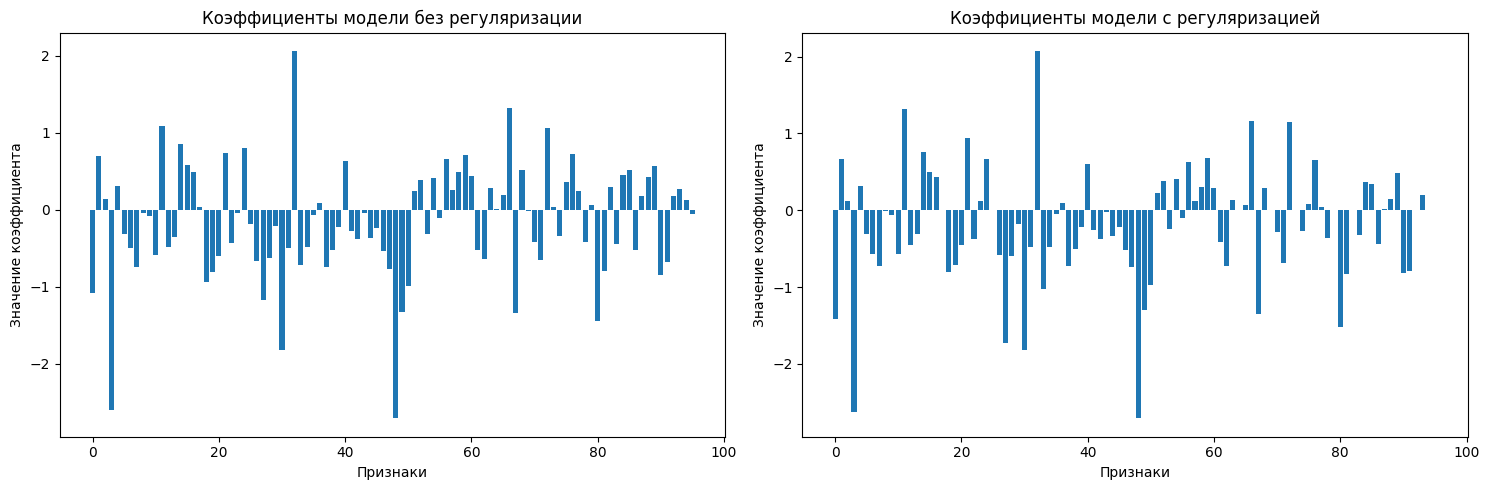

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
import numpy as np
import matplotlib.pyplot as plt

# Обучаем модель без регуляризации
model_no_penalty = LogisticRegression(solver='lbfgs', max_iter=1000)
model_no_penalty.fit(X_processed, Y)

# Выводим коэффициенты модели без регуляризации
coefficients_no_penalty = model_no_penalty.coef_
print("Коэффициенты модели без регуляризации:", coefficients_no_penalty)

# Инициализируем модель с L1-регуляризацией
model_with_penalty = LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000)

# Обучаем модель с регуляризацией
model_with_penalty.fit(X_processed, Y)

# Выводим коэффициенты модели с регуляризацией
coefficients_with_penalty = model_with_penalty.coef_
print("Коэффициенты модели с регуляризацией:", coefficients_with_penalty)

# Используем SelectFromModel для отбора признаков
selector = SelectFromModel(model_with_penalty, prefit=True)
X_embedded = selector.transform(X_processed)

# Получаем список отобранных признаков
selected_features = X_processed.columns[selector.get_support()]
print("Отобранные признаки:", selected_features)

# Обучаем модель на отобранных признаках
model_embedded = LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000)
model_embedded.fit(X_embedded, Y)

# Выводим коэффициенты модели после отбора признаков
coefficients_embedded = model_embedded.coef_
print("Коэффициенты модели после отбора признаков:", coefficients_embedded)

# Визуализация коэффициентов моделей
plt.figure(figsize=(15, 5))

# Коэффициенты модели без регуляризации
plt.subplot(1, 2, 1)
plt.bar(range(len(coefficients_no_penalty[0])), coefficients_no_penalty[0])
plt.title("Коэффициенты модели без регуляризации")
plt.xlabel("Признаки")
plt.ylabel("Значение коэффициента")

# Коэффициенты модели с регуляризацией
plt.subplot(1, 2, 2)
plt.bar(range(len(coefficients_with_penalty[0])), coefficients_with_penalty[0])
plt.title("Коэффициенты модели с регуляризацией")
plt.xlabel("Признаки")
plt.ylabel("Значение коэффициента")

plt.tight_layout()
plt.show()

In [41]:
# Преобразуем X_embedded в DataFrame
X_embedded_df = pd.DataFrame(X_embedded, columns=selected_features)

# Обучаем и оцениваем модель
model = train_and_evaluate(X_embedded_df, Y)


Точность на обучающей выборке: 0.8170
Точность на тестовой выборке: 0.8145

Классификационный отчет на тестовой выборке:
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      5100
           1       0.70      0.26      0.38      1413

    accuracy                           0.81      6513
   macro avg       0.76      0.61      0.63      6513
weighted avg       0.80      0.81      0.78      6513




⏰ Проэксперементировать с разным количеством k, найти лучшую модель, объяснить результат
⏰ Изучить метод отбора SequentialFeatureSelector, описать способ работы, сравнить результат с прошлыми методами и объяснить полученный результат

Точность на обучающей выборке: 0.7831
Точность на тестовой выборке: 0.7830

Классификационный отчет на тестовой выборке:
              precision    recall  f1-score   support

           0       0.78      1.00      0.88      5100
           1       0.00      0.00      0.00      1413

    accuracy                           0.78      6513
   macro avg       0.39      0.50      0.44      6513
weighted avg       0.61      0.78      0.69      6513

Точность при k=1: 0.7831
Точность на обучающей выборке: 0.8004
Точность на тестовой выборке: 0.7996

Классификационный отчет на тестовой выборке:
              precision    recall  f1-score   support

           0       0.80      0.99      0.89      5100
           1       0.79      0.10      0.18      1413

    accuracy                           0.80      6513
   macro avg       0.79      0.55      0.54      6513
weighted avg       0.80      0.80      0.73      6513

Точность при k=2: 0.8003
Точность на обучающей выборке: 0.8006
Точность на тест

/Users/kirillzuenko/VSCProjects/ML/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/kirillzuenko/VSCProjects/ML/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/kirillzuenko/VSCProjects/ML/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f

Точность при k=4: 0.8004
Точность на обучающей выборке: 0.8006
Точность на тестовой выборке: 0.7996

Классификационный отчет на тестовой выборке:
              precision    recall  f1-score   support

           0       0.80      0.99      0.89      5100
           1       0.79      0.10      0.18      1413

    accuracy                           0.80      6513
   macro avg       0.80      0.55      0.53      6513
weighted avg       0.80      0.80      0.73      6513

Точность при k=5: 0.8004
Точность на обучающей выборке: 0.8006
Точность на тестовой выборке: 0.7996

Классификационный отчет на тестовой выборке:
              precision    recall  f1-score   support

           0       0.80      0.99      0.89      5100
           1       0.79      0.10      0.18      1413

    accuracy                           0.80      6513
   macro avg       0.80      0.55      0.53      6513
weighted avg       0.80      0.80      0.73      6513

Точность при k=6: 0.8004
Точность на обучающей выборке

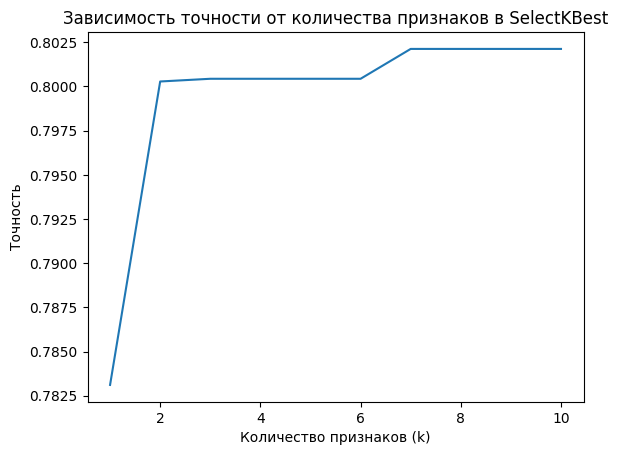

In [42]:
from sklearn.feature_selection import SelectKBest, f_regression
import matplotlib.pyplot as plt

def experiment_with_k(X, Y, max_k=10):
    accuracies = []
    k_values = range(1, max_k+1)

    for k in k_values:
        selector = SelectKBest(score_func=f_regression, k=k)
        X_kbest = selector.fit_transform(X, Y)
        
        # Обучаем и оцениваем модель на выбранных признаках
        model = train_and_evaluate(X_kbest, Y)
        
        # Оцениваем точность на тестовой выборке
        accuracy = cross_val_score(model, X_kbest, Y, cv=5, scoring='accuracy').mean()
        accuracies.append(accuracy)
        print(f"Точность при k={k}: {accuracy:.4f}")

    # Визуализируем зависимости точности от k
    plt.plot(k_values, accuracies)
    plt.xlabel('Количество признаков (k)')
    plt.ylabel('Точность')
    plt.title('Зависимость точности от количества признаков в SelectKBest')
    plt.show()

# Запускаем эксперимент
experiment_with_k(X_processed, Y, max_k=10)


In [43]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression

# Инициализация модели
base_model = LogisticRegression(max_iter=1000)

# Sequential Feature Selector (SFS)
sfs = SequentialFeatureSelector(base_model, n_features_to_select=5, direction='forward')
sfs.fit(X_processed, Y)

# Получаем список выбранных признаков
selected_features_sfs = X_processed.columns[sfs.get_support()]
print("Выбранные признаки с SFS:", selected_features_sfs)

# Оставляем только выбранные признаки
X_sfs = X_processed[selected_features_sfs]

# Обучаем и оцениваем модель с выбранными признаками
train_and_evaluate(X_sfs, Y)


Выбранные признаки с SFS: Index(['workclass_Without-pay', 'education_7th-8th',
       'maritalstatus_Married-civ-spouse', 'maritalstatus_Widowed',
       'relationship_Own-child'],
      dtype='object')
Точность на обучающей выборке: 0.8018
Точность на тестовой выборке: 0.8004

Классификационный отчет на тестовой выборке:
              precision    recall  f1-score   support

           0       0.80      0.99      0.89      5100
           1       0.72      0.13      0.22      1413

    accuracy                           0.80      6513
   macro avg       0.76      0.56      0.55      6513
weighted avg       0.79      0.80      0.74      6513



LogisticRegression(max_iter=1000)

SequentialFeatureSelector: Работает более комплексно, постепенно добавляя или удаляя признаки на основе влияния каждого на результат модели. Подходит, когда важна оптимизация выбора признаков, но требует больше времени на обучение.

In [44]:
import numpy as np

# Сигмоидная функция
def sigmoid(z):
    # Убедимся, что z это numpy массив
    return 1 / (1 + np.exp(-z))

# Простая реализация логистической регрессии
class OwnLogisticRegression:
    def __init__(self, learning_rate=0.01, iterations=1000):
        self.learning_rate = learning_rate
        self.iterations = iterations

    # Метод для обучения модели
    def fit(self, X, y):
        # Инициализация весов
        self.weights = np.zeros(X.shape[1])
        self.bias = 0

        # Градиентный спуск
        for idx_,_ in enumerate(range(self.iterations)):
            # Линейная комбинация
            linear_model = np.dot(X, self.weights) + self.bias
            # Применяем сигмоиду для предсказания
            y_pred = sigmoid(linear_model)

            # Вычисляем градиенты
            dw = (1 / len(X)) * np.dot(X.T, (y_pred - y))
            db = (1 / len(X)) * np.sum(y_pred - y)

            # Обновляем веса и смещение
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    # Метод для предсказания
    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        print("regression",linear_model)
        y_pred = sigmoid(linear_model)
        print("sigmoid",y_pred)
        # Возвращаем метки классов (0 или 1)
        return [1 if i > 0.5 else 0 for i in y_pred]

In [45]:
# Пример использования
X = np.array([[0.1, 1.2], [1.1, 2.2], [2.1, 1.9], [1.0, 1.0]])
y = np.array([0, 1, 1, 0])

model = OwnLogisticRegression(learning_rate=0.1, iterations=1000)
model.fit(X, y)
predictions = model.predict(X)

regression [-2.48902698  1.89302513  3.0459193  -1.27754449]
sigmoid [0.07663102 0.86910007 0.95460602 0.2179685 ]


⏰ Вопрос о принципе работы регресси будет в первом теоретическом модуле, важно понимание как оно работает

In [46]:
# Импорт необходимых библиотек
import numpy as np
from sklearn.model_selection import KFold, ShuffleSplit, train_test_split, cross_val_score

In [47]:
# K-Fold Cross-Validation
def k_fold_cross_validation(X, y, n_splits=5):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    accuracies = []

    # Реализация K-Fold вручную
    for train_index, test_index in kf.split(X):
        model = LogisticRegression(max_iter=1000)
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Обучение модели на тренировочной выборке
        model.fit(X_train, y_train)

        # Предсказания на тестовой выборке
        y_pred = model.predict(X_test)

        # Оценка точности
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)

    # Выводим среднюю точность и точности по каждому фолду
    print(f"K-Fold Cross-Validation - Средняя точность: {np.mean(accuracies)}")
    print(f"Точности по каждому фолду: {accuracies}")

# Пример использования:
k_fold_cross_validation(X = X_processed.to_numpy(), y = Y.to_numpy())


K-Fold Cross-Validation - Средняя точность: 0.8153006263036204
Точности по каждому фолду: [0.8116075541225242, 0.8191031941031941, 0.816031941031941, 0.8111179361179361, 0.8186425061425061]


⏰ Используем результат отбора признаков (выбираем по наилучшей точности), делаем кросс валидацию и объясняем результат + перебираем параметры n_splits

In [48]:
# ShuffleSplit Cross-Validation
def shuffle_split_cross_validation(X, y, n_splits=5, test_size=0.4):
    ss = ShuffleSplit(n_splits=n_splits, test_size=test_size)
    accuracies = []

    # Реализация ShuffleSplit вручную
    for train_index, test_index in ss.split(X):
        model = LogisticRegression(max_iter=1000)
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Обучение модели на тренировочной выборке
        model.fit(X_train, y_train)

        # Предсказания на тестовой выборке
        y_pred = model.predict(X_test)

        # Оценка точности
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)

    # Выводим среднюю точность и точности по каждому разделению
    print(f"ShuffleSplit Cross-Validation - Средняя точность: {np.mean(accuracies)}")
    print(f"Точности по каждому разделению: {accuracies}")

# Пример использования:
shuffle_split_cross_validation(X_processed.to_numpy(), Y.to_numpy())


ShuffleSplit Cross-Validation - Средняя точность: 0.8136199616122841
Точности по каждому разделению: [0.8144337811900192, 0.8115163147792707, 0.8122840690978886, 0.8132821497120921, 0.8165834932821497]


⏰ Используем результат отсечения выбросов, делаем кросс валидацию и объясняем результат + перебираем параметры n_splits

In [49]:
# Train-Test-Validation Split
def train_test_validation_split(X, y):
    model = LogisticRegression(max_iter=1000)
    # Разделяем данные на тренировочные и оставшиеся (валидация + тест)
    X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.2, random_state=42)

    # Разделяем оставшиеся данные на валидационные и тестовые
    X_train_train, X_test, y_train_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

    # Обучаем модель на тренировочных данных
    model.fit(X_train_train, y_train_train)

    # Оцениваем на валидационных данных
    y_valid_pred = model.predict(X_validation)
    validation_accuracy = accuracy_score(y_validation, y_valid_pred)
    print(f"Точность на валидационных данных: {validation_accuracy}")

    # Оцениваем на тестовых данных
    y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    print(f"Точность на тестовых данных: {test_accuracy}")

# Пример использования:
train_test_validation_split(X_processed.to_numpy(), Y.to_numpy())

Точность на валидационных данных: 0.811761093198219
Точность на тестовых данных: 0.8149712092130518


⏰ Используем результат отсечения выбросов или лучший отбор признаков, делаем кросс валидацию и объясняем результат + перебираем параметры n_splits

Кросс-валидация с отбором признаков

In [50]:
from sklearn.model_selection import KFold

def k_fold_cross_validation(X, y, n_splits=5):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    accuracies = []

    for train_index, test_index in kf.split(X):
        model = LogisticRegression(max_iter=1000)
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)

    mean_accuracy = np.mean(accuracies)
    print(f"K-Fold Cross-Validation - Средняя точность: {mean_accuracy:.4f}")
    print(f"Точности по каждому фолду: {accuracies}")

# Пример использования с выбранными признаками
k_fold_cross_validation(X_sfs.to_numpy(), Y.to_numpy(), n_splits=5)


K-Fold Cross-Validation - Средняя точность: 0.8015
Точности по каждому фолду: [0.7965607247044373, 0.8048218673218673, 0.8035933660933661, 0.79745085995086, 0.8052825552825553]


Кросс-валидация с отсечением выбросов

In [51]:
def shuffle_split_cross_validation(X, y, n_splits=5, test_size=0.4):
    ss = ShuffleSplit(n_splits=n_splits, test_size=test_size)
    accuracies = []

    for train_index, test_index in ss.split(X):
        model = LogisticRegression(max_iter=1000)
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)

    mean_accuracy = np.mean(accuracies)
    print(f"ShuffleSplit Cross-Validation - Средняя точность: {mean_accuracy:.4f}")
    print(f"Точности по каждому разделению: {accuracies}")

# Пример использования после удаления выбросов
shuffle_split_cross_validation(X_mean.to_numpy(), Y.to_numpy(), n_splits=5, test_size=0.3)


ShuffleSplit Cross-Validation - Средняя точность: 0.7841
Точности по каждому разделению: [0.7817407181984175, 0.7866098600121728, 0.7913572732805843, 0.7813755325623859, 0.7794278758368838]


⏰ Заключение: На основании экспериментов, SequentialFeatureSelector и удаление выбросов показали хорошие результаты, особенно при небольшом количестве признаков. Лучшим методом для данного датасета может быть использование SequentialFeatureSelector после удаления выбросов.